In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv(r'/content/credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [119]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [120]:
df.checking_status.value_counts()
z=print(df.columns)
z

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [121]:
#Checking null counts of each column in dataframe 
for column in df.columns:
      print(column)
      print(df[column].isnull().sum())


checking_status
0
duration
0
credit_history
0
purpose
0
credit_amount
0
savings_status
0
employment
0
installment_commitment
0
personal_status
0
other_parties
0
residence_since
0
property_magnitude
0
age
0
other_payment_plans
0
housing
0
existing_credits
0
job
0
num_dependents
0
own_telephone
0
foreign_worker
0
class
0


In [122]:
#Checking value counts of each column in dataframe with dtype==Object
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print(df[column].value_counts())


checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64
savings_status
<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64
employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64
personal_status
male sin

In [123]:
Split_col_personal_status= df['personal_status'].str.split(" ",n=1,expand=True)
df['gender']=Split_col_personal_status[0]
df['marital_status']=Split_col_personal_status[1]
df.drop(columns=['personal_status'],inplace=True,axis=1)

In [124]:
str_columns=[]
for i in df.columns:
    if df[i].dtype=='object':
        str_columns.append(i)

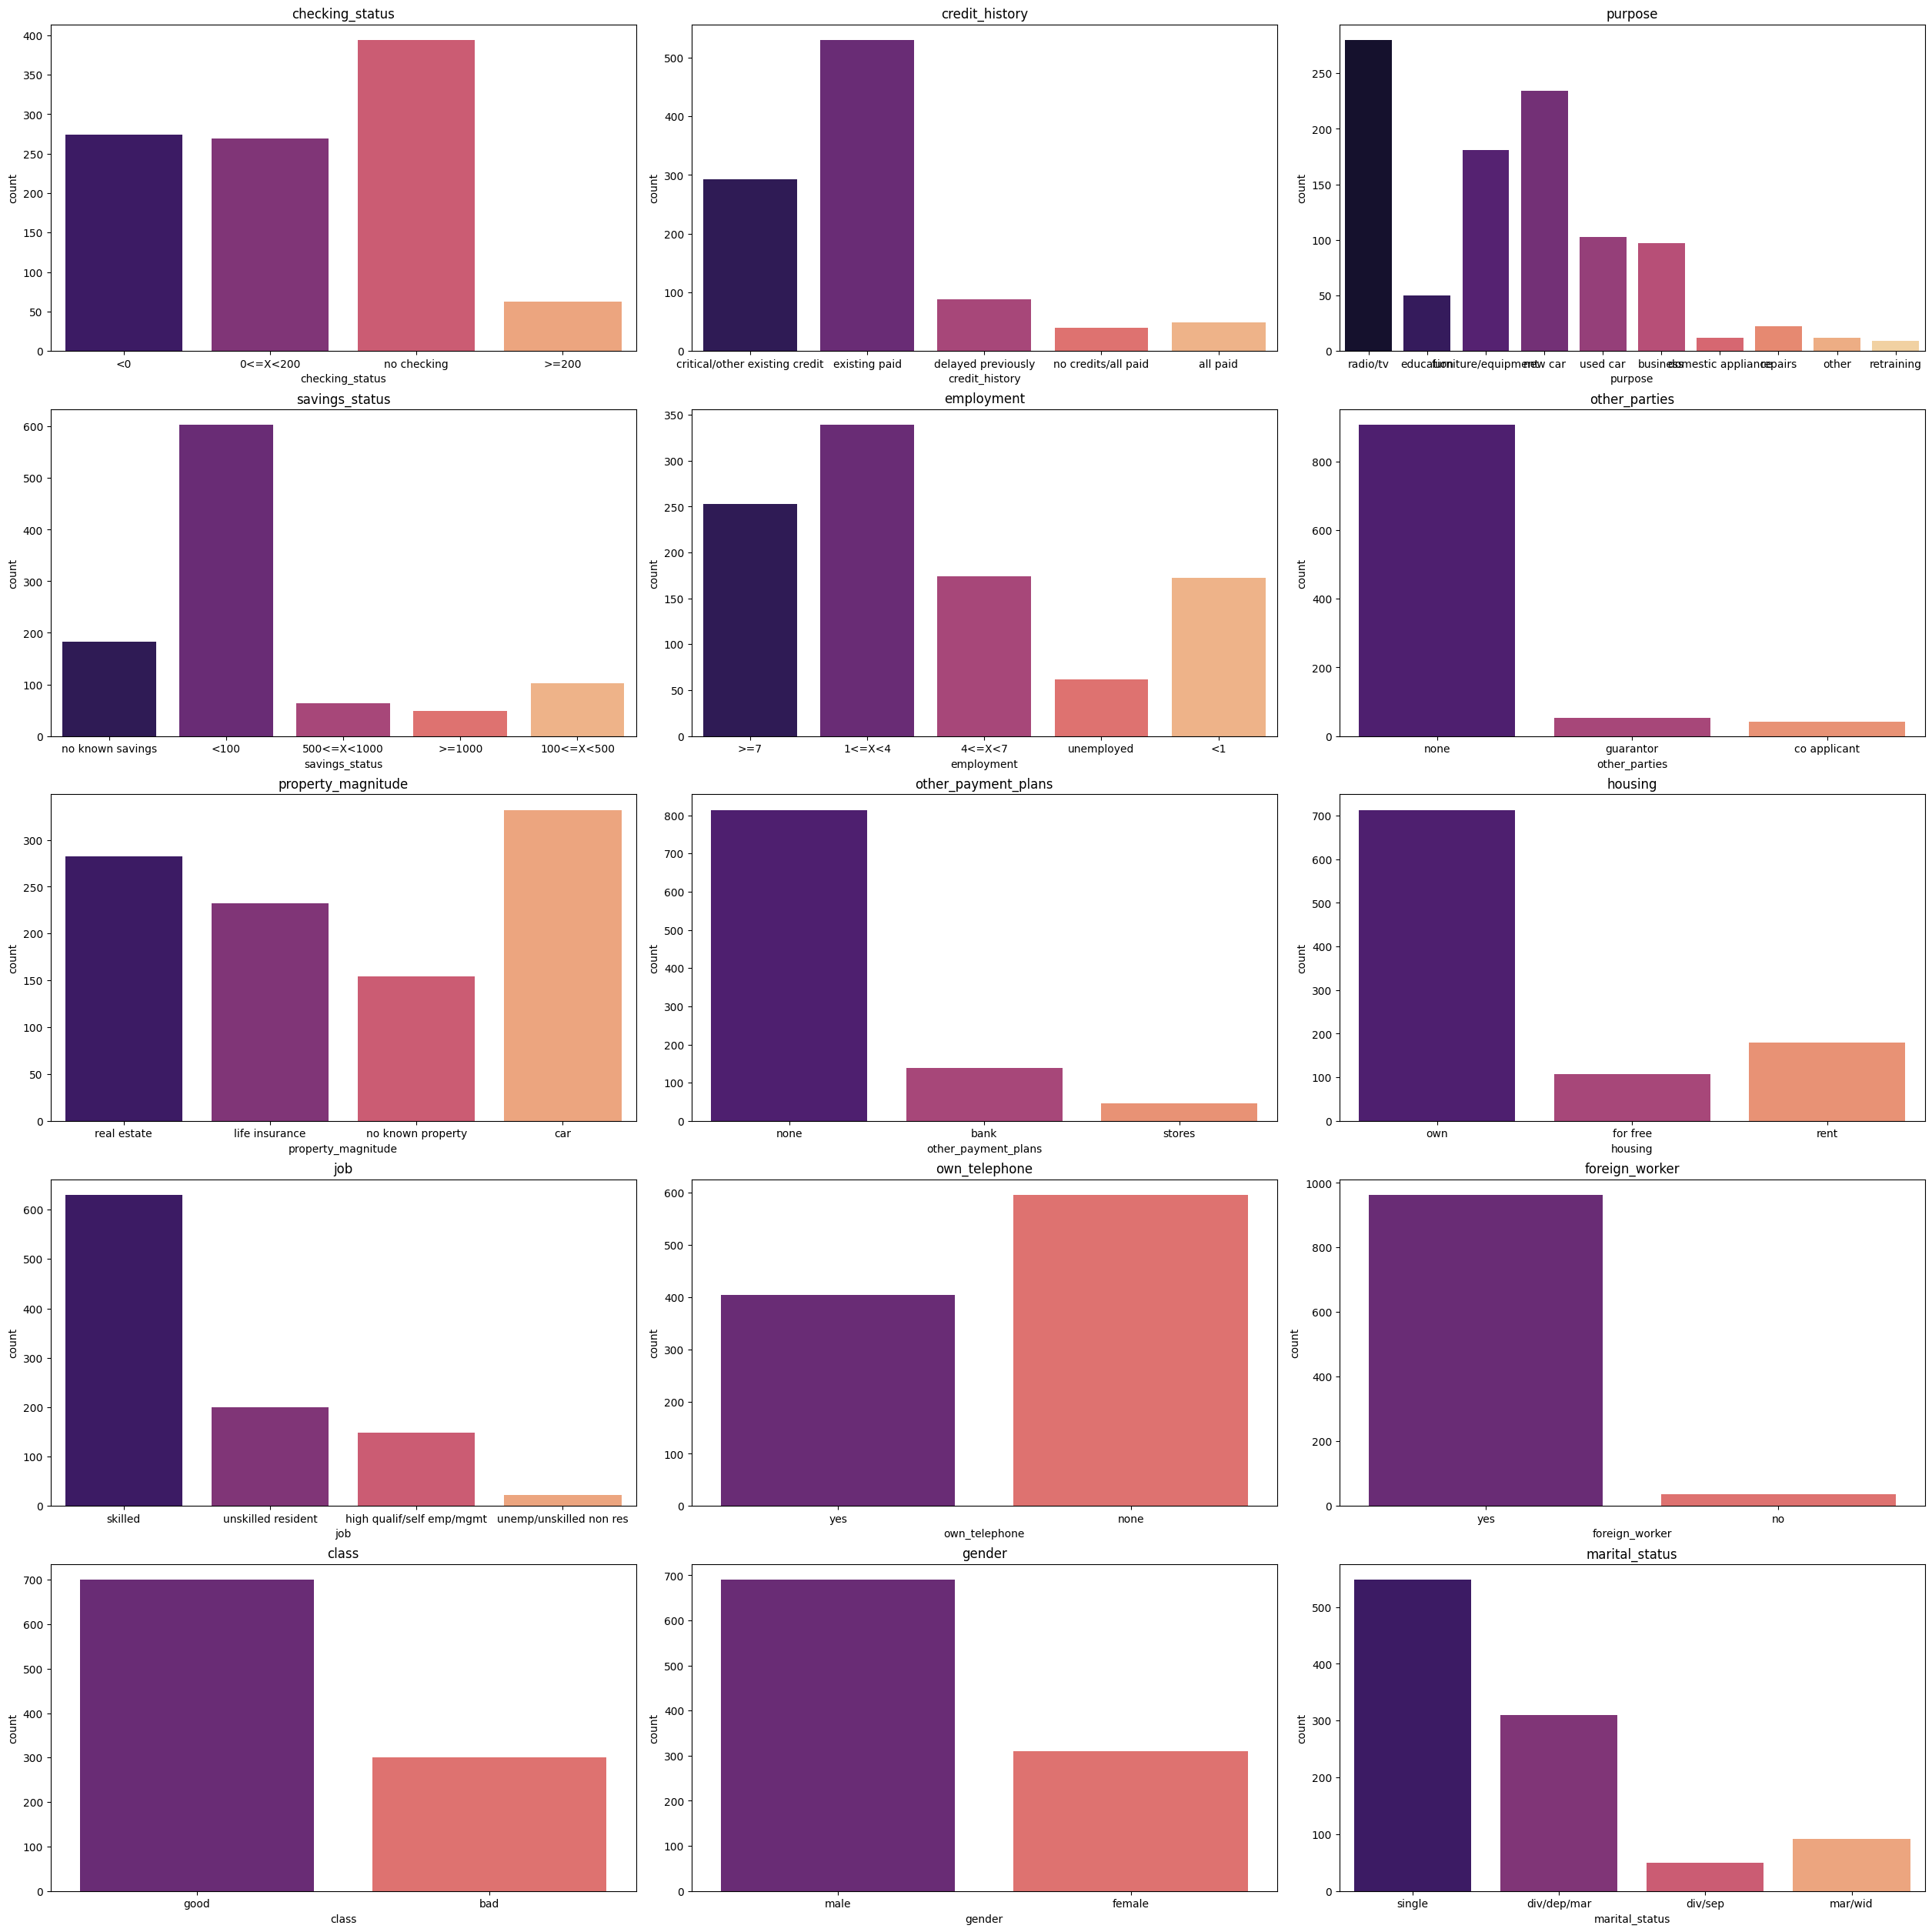

In [125]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    sns.countplot(data=df,x=str_columns[i],palette='magma',)
    plt.title(str_columns[i])
plt.show()

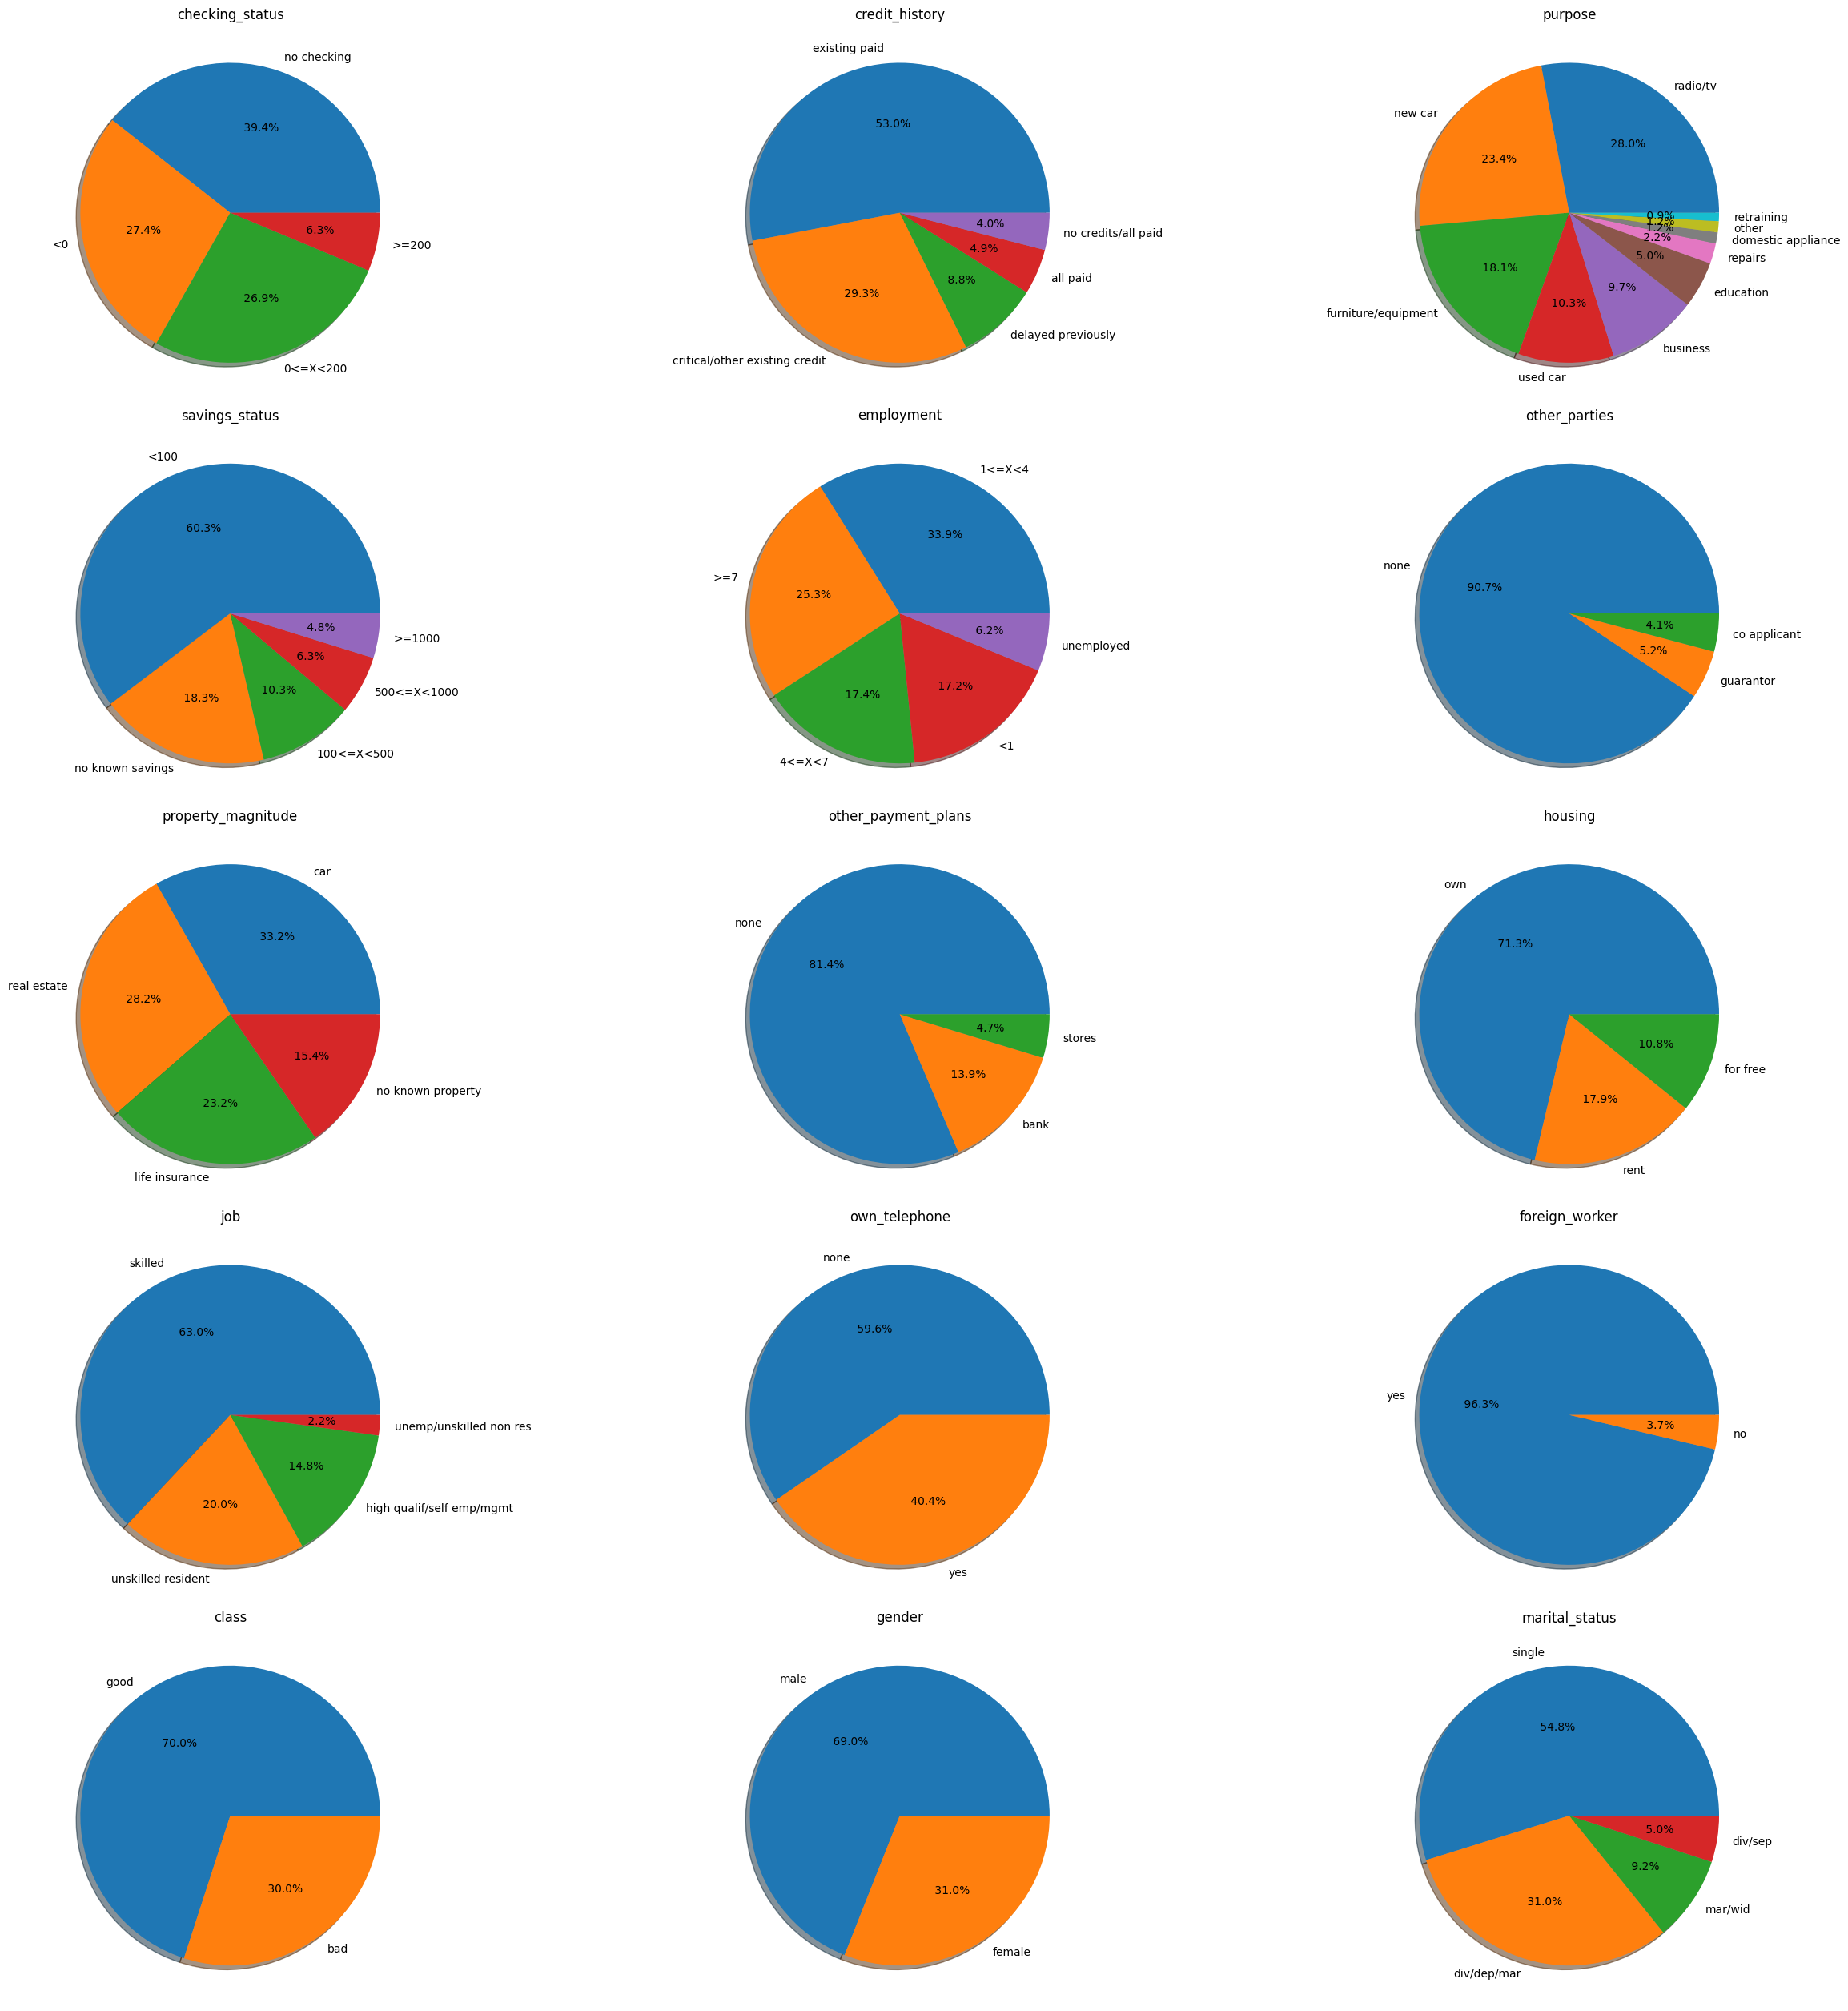

In [126]:
plt.figure(figsize=(25,25),layout='constrained')
for i in range(len(str_columns)):
    plt.subplot(5,3,i+1)
    a=df[str_columns[i]].value_counts()
    lbl=a.index
    plt.pie(x=a,labels=lbl,autopct="% .1f%%",shadow=True)
    plt.title(str_columns[i])
plt.show()

In [127]:
df.dtypes

checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
gender                     object
marital_status             object
dtype: object

In [128]:
str_columns
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# iterate over all columns in the DataFrame
for column in str_columns:
        # fit and transform the column with the LabelEncoder object
        df[column] = le.fit_transform(df[column])


In [129]:
from sklearn.preprocessing import MinMaxScaler

# create a LabelEncoder object
scaler = MinMaxScaler()

# iterate over all columns in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':
        # fit and transform the column with the LabelEncoder object
        df[column] = scaler.fit_transform(df[column])


In [130]:
#Checking value counts of each column in dataframe with dtype==Object
for column in df.columns:
      print(column)
      print(df[column].value_counts())


checking_status
3    394
1    274
0    269
2     63
Name: checking_status, dtype: int64
duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: duration, dtype: int64
credit_history
3    530
1    293
2     88
0     49
4     40
Name: credit_history, dtype: int64
purpose
6    280
4    234
3    181
9    103
0     97
2     50
7     22
1     12
5     12
8      9
Name: purpose, dtype: int64
credit_amount
1478.0    3
1262.0    3
1258.0    3
1275.0    3
1393.0    3
         ..
1459.0    1
882.0     1
3758.0    1
1136.0    1
4576.0    1
Name: credit_amount, Length: 921, dtype: int64
savings_status
2    603
4    183
0    103
1     63
3     48
Name

In [131]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'gender', 'marital_status'],
      dtype='object')

In [132]:
X=df.drop(columns=['class'],axis=1)



In [133]:
Y=df['class']

In [134]:
print('X_Shape',X.shape)
print('Y_Shape',Y.shape)

X_Shape (1000, 21)
Y_Shape (1000,)


In [135]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [136]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (700, 21)
x_test (300, 21)
y_train (700,)
y_test (300,)


In [137]:
# Logistic Regreesion Model
def model_log_reg(x_train,x_test,y_train,y_test):
    global acc_lr,f1_lr
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Logistic Regression***********')
    print('\n')
    print('Accuracy : ',acc_lr)
    print('F1 Score : ',f1_lr)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [138]:
# Guassian RM
def model_KNN(x_train,x_test,y_train,y_test):
    global acc_knn,f1_knn
    KNN=KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_knn=accuracy_score(y_test,y_pred)
    f1_knn=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** KNeighbors_Classifier***********')
    print('\n')
    print('Accuracy : ',acc_knn)
    print('F1 Score : ',f1_knn)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [139]:
# Guassian RM
def model_RF(x_train,x_test,y_train,y_test):
    global acc_rf,f1_rf
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    y_pred=RF.predict(x_test)

    conf_lr=confusion_matrix(y_test,y_pred)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    clf_lr=classification_report(y_test,y_pred)

    print('*********** Random Forest***********')
    print('\n')
    print('Accuracy : ',acc_rf)
    print('F1 Score : ',f1_rf)
    print(10*' ')
    print('Confusion Matrix :\n',conf_lr)
    print(10*' ')
    print('Classification Report :\n',clf_lr)
    print(10*' ')

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


model_log_reg(x_train,x_test,y_train,y_test)
model_KNN(x_train,x_test,y_train,y_test)
model_RF(x_train,x_test,y_train,y_test)

*********** Logistic Regression***********


Accuracy :  0.7033333333333334
F1 Score :  0.8061002178649236
          
Confusion Matrix :
 [[ 26  60]
 [ 29 185]]
          
Classification Report :
               precision    recall  f1-score   support

           0       0.47      0.30      0.37        86
           1       0.76      0.86      0.81       214

    accuracy                           0.70       300
   macro avg       0.61      0.58      0.59       300
weighted avg       0.67      0.70      0.68       300

          
*********** KNeighbors_Classifier***********


Accuracy :  0.63
F1 Score :  0.753880266075388
          
Confusion Matrix :
 [[ 19  67]
 [ 44 170]]
          
Classification Report :
               precision    recall  f1-score   support

           0       0.30      0.22      0.26        86
           1       0.72      0.79      0.75       214

    accuracy                           0.63       300
   macro avg       0.51      0.51      0.50       300
weighted 


 LogisticRegression()
f1-Score(train): mean= (0.686), min=(0.662)) ,max= (0.708), stdev= (0.019)
f1-Score(test): 0.6849

 KNeighborsClassifier()
f1-Score(train): mean= (0.656), min=(0.606)) ,max= (0.701), stdev= (0.035)
f1-Score(test): 0.6568

 RandomForestClassifier()
f1-Score(train): mean= (0.720), min=(0.684)) ,max= (0.745), stdev= (0.023)
f1-Score(test): 0.7335


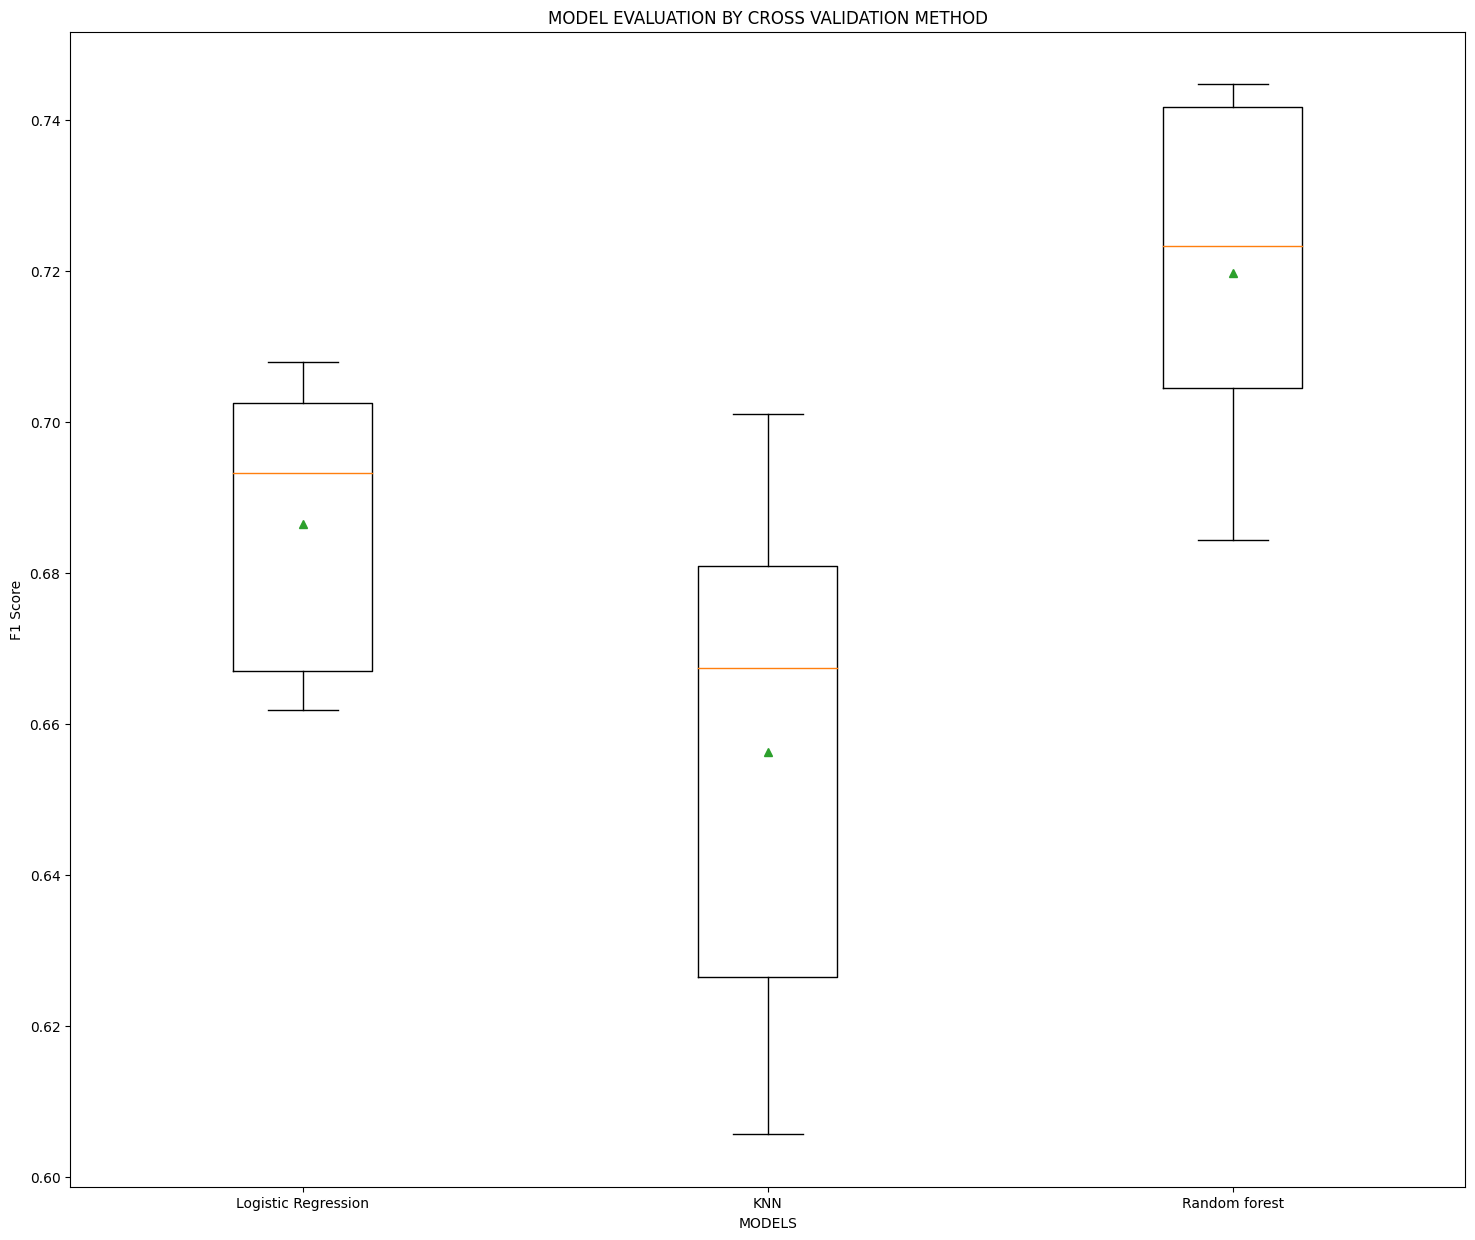

In [141]:
# Using cross validation method to avoid overfitting
import statistics as st
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold,cross_val_predict



###############################################################################
# Model building
lr =LogisticRegression()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
m  =[lr,knn,rf]
model_name=['Logistic Regression','KNN','Random forest']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(18,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [142]:
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','KNN','Random Forest'])
tbl['Accuracy']=pd.Series([acc_lr,acc_knn,acc_rf])
tbl['F1_Score']=pd.Series([f1_lr,f1_knn,f1_rf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.703333,0.806100
KNN,0.630000,0.753880
Random Forest,0.743333,0.834409


In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [150]:
# defining the classifier
model = RandomForestClassifier(random_state=1)
# creating a dic for the grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None],
    'max_features': ['sqrt', 'log2']
}

# defining the CV
cv = StratifiedKFold(n_splits=5)
# initializing the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=cv,scoring='f1_weighted')
# estimator===model used(random forest,Linear etc)
# para=parameters used 
# cv=StratifiedKFold(n_splits=5)
# scoring='f1_weighted'
# training the model on grid search for hyperparameter tuning of Adaboost
grid_result = grid_search.fit(x_train,y_train)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.717390 using {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [151]:
ab= RandomForestClassifier(max_depth= None, n_estimators = 200,random_state=1,max_features='sqrt')
cv=StratifiedKFold(n_splits=5)
n_scores=cross_val_score(ab,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1,error_score='raise',)
y_pred=cross_val_predict(ab,x_train,y_train,cv=cv)


acc_tst=accuracy_score(y_train,y_pred)


print('***********RandomForestClassifier***********')
print('\n')
print('Testing Accuracy Score : ',acc_tst)

***********RandomForestClassifier***********


Testing Accuracy Score :  0.7428571428571429
